In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [4]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

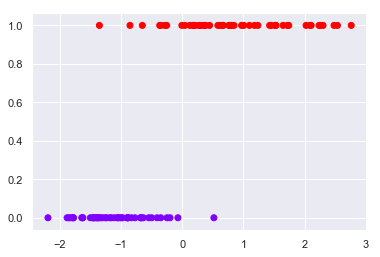

In [6]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [7]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [8]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.62632685]]
[-0.67445391]


In [44]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [45]:
y_pred = lr.predict(x_test)

In [47]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[10,  2],
       [ 0, 13]])

In [48]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.14523978, 0.85476022],
       [0.63543584, 0.36456416],
       [0.88258525, 0.11741475],
       [0.99577826, 0.00422174],
       [0.7745509 , 0.2254491 ],
       [0.14065575, 0.85934425],
       [0.45415786, 0.54584214],
       [0.1276361 , 0.8723639 ],
       [0.07135595, 0.92864405],
       [0.94038378, 0.05961622],
       [0.08803493, 0.91196507],
       [0.14580049, 0.85419951],
       [0.07293242, 0.92706758],
       [0.43192407, 0.56807593],
       [0.16031041, 0.83968959],
       [0.03297248, 0.96702752],
       [0.11386981, 0.88613019],
       [0.9973331 , 0.0026669 ],
       [0.78837851, 0.21162149],
       [0.48612192, 0.51387808],
       [0.15125306, 0.84874694],
       [0.75047873, 0.24952127],
       [0.23233382, 0.76766618],
       [0.99593378, 0.00406622],
       [0.97640103, 0.02359897]])

In [49]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

In [50]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

![title]('pic.png')